# Actividad Evaluable: Patrones con K-means

1. Carga tus datos

In [212]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

datos = pd.read_csv("covid19_tweets.csv")
datos['user_created'] = pd.to_datetime(datos['user_created'])
datos['user_created'] = datos['user_created'].dt.date

datos['date'] = pd.to_datetime(datos['date'])
datos['date'] = datos['date'].dt.date

def fecha_a_numero(fecha):
    return int(fecha.strftime('%Y%m%d'))

def user_verified_num(booleano):
    if(booleano == True):
        return 1
    else:
        return 0   

datos['user_created_entero'] = datos['user_created'].apply(fecha_a_numero)
datos['date_entero'] =  datos['date'].apply(fecha_a_numero)
datos['user_verified_entero'] = datos['user_verified'].apply(user_verified_num)




2. Si determinas que alguna variable no sirve basándose en la actividad pasada, elimínala y justifica por qué quitaste o no variables.

In [213]:
del datos['user_name'] # Algunos datos no se pueden leer correctamente.
del datos['user_location'] # Algunos datos no se pueden leer correctamente.
del datos['user_description'] # Algunos datos no se pueden leer correctamente.
del datos['text'] # Algunos datos no se pueden leer correctamente.
del datos['hashtags'] # Algunos datos no se pueden leer correctamente.
del datos['source'] # Los datos obtenidos por esta columna nos parecen irrevelantes para la información que buscamos obtener.
del datos['is_retweet'] # Este dato es exactamente igual en todas las filas. 

3. Determina un valor de k.  
Usaremos k = 3 para algunos y k = 2 para otros, según convenga.
4. Utilizando scikit-learn calcula los centros del algoritmo k-means.  
Calcularemos los centros de 4 pares de columnas, utilizando las de mayor coeficiente de correlación.

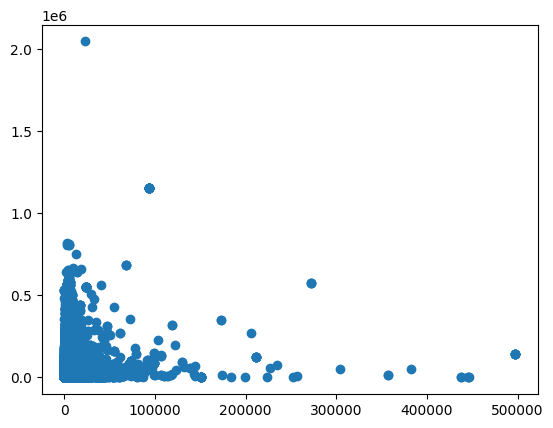

In [214]:
var=[]
for j in range(len(datos["user_friends"])):
  var.append([datos["user_friends"][j], datos["user_favourites"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

c:\Users\pabol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


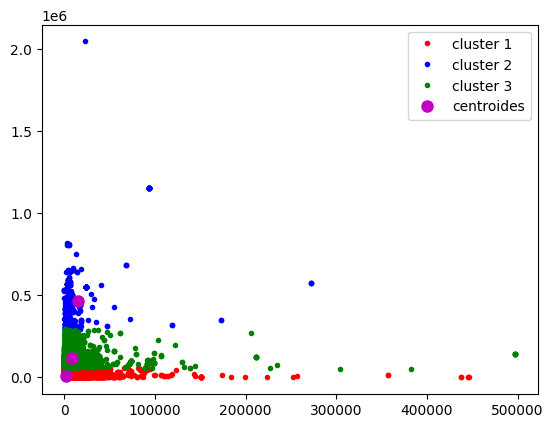

In [215]:
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(var2[etiquetas==2,0],var2[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

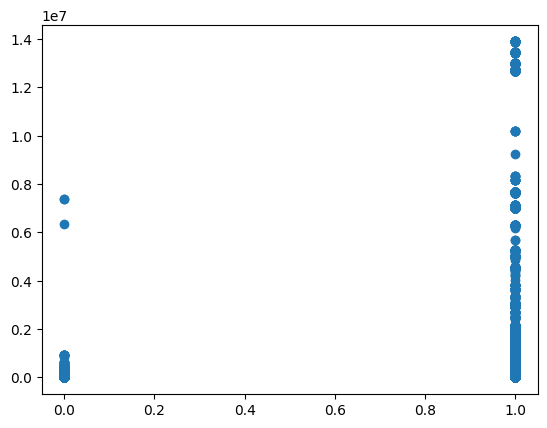

In [216]:
var=[]
for j in range(len(datos["user_verified_entero"])):
  var.append([datos["user_verified_entero"][j], datos["user_followers"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

c:\Users\pabol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


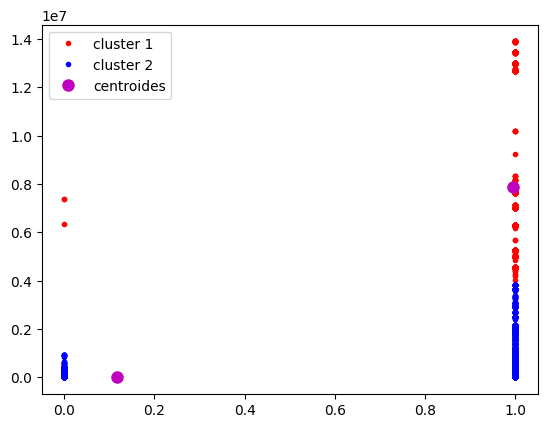

In [217]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

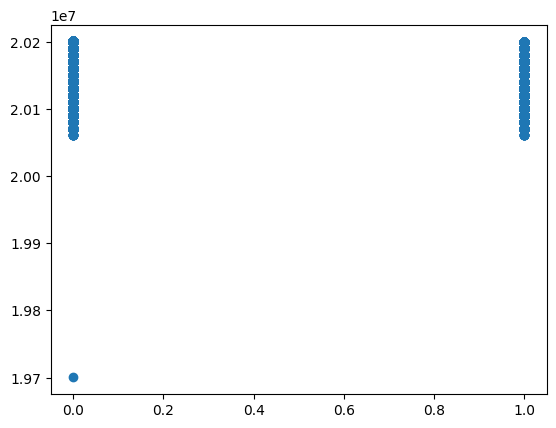

In [218]:

var=[]
for j in range(len(datos["user_verified_entero"])):
  var.append([datos["user_verified_entero"][j], datos["user_created_entero"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])


c:\Users\pabol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


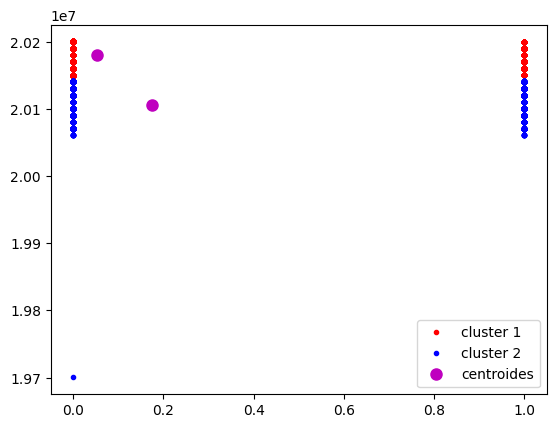

In [219]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()

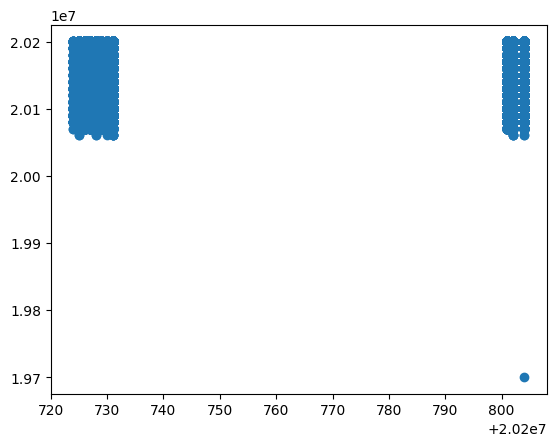

In [220]:
var=[]
for j in range(len(datos["date_entero"])):
  var.append([datos["date_entero"][j], datos["user_created_entero"][j]])


var2=np.array(var)
plt.scatter(var2[:,0],var2[:,1])

c:\Users\pabol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


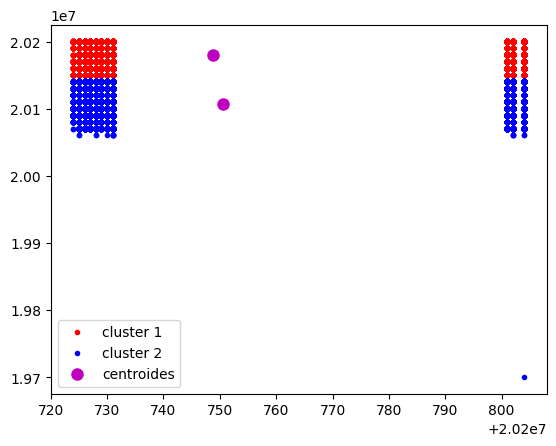

In [221]:
n = 2
k_means = KMeans(n_clusters=n)
k_means.fit(var2)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

plt.plot(var2[etiquetas==0,0],var2[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(var2[etiquetas==1,0],var2[etiquetas==1,1],'b.', label='cluster 2')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=8, label='centroides')

plt.legend(loc='best')
plt.show()